In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import os, sys

In [15]:
# load exact data
exact = "exact.dat"
exact_data = np.loadtxt(exact)
Ls, exact_data = exact_data[:, 0], exact_data[:, 1]

# load sample data
sample = "sample_medium.dat"
sample_data = np.loadtxt(sample)
sample_Ls, sample_data = sample_data[:, 0], sample_data[:, 1]

predict_data = []
for file in os.listdir("./seeds/"):
    predict_data.append(np.loadtxt(f"./seeds/{file}")[:,1])
predict_data = np.array(predict_data)

In [16]:
mean_pred = predict_data.mean(axis=0)

p10 = np.percentile(predict_data, 10, axis=0)
p90 = np.percentile(predict_data, 90, axis=0)

p25 = np.percentile(predict_data, 25, axis=0)
p75 = np.percentile(predict_data, 75, axis=0)

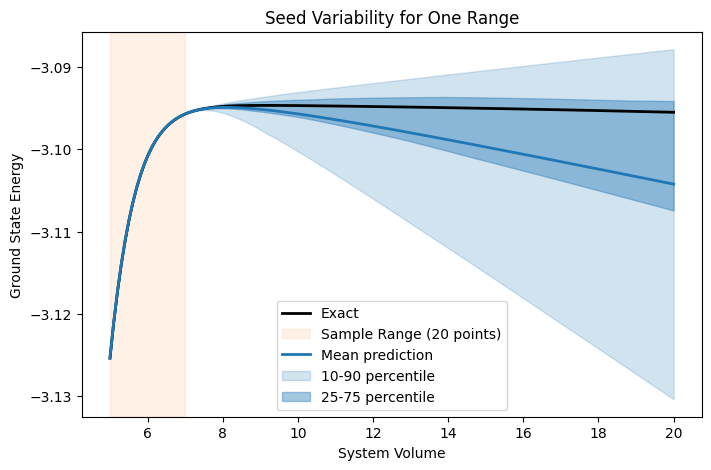

In [19]:
fig, ax = plt.subplots(figsize=(8,5))
# plot exact data and sample set
ax.plot(Ls, exact_data, 'k', lw=2.0, alpha=1.0, label="Exact")
ax.axvspan(5.0, 7.0, color="tab:orange", alpha=0.1, label="Sample Range (20 points)")

# plot mean predictions and percentile band
ax.plot(Ls, mean_pred, color="tab:blue", lw=2.0, label="Mean prediction")
ax.fill_between(Ls, p10, p90, color="tab:blue", alpha=0.2, label="10-90 percentile")
ax.fill_between(Ls, p25, p75, color="tab:blue", alpha=0.4, label="25-75 percentile")

ax.set_xlabel("System Volume")
ax.set_ylabel("Ground State Energy")
ax.set_title("Seed Variability for One Range")
plt.legend()
plt.savefig("extrapolation_percentile.png")
plt.show()